In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
df= pd.read_csv('Cost_of_Living_Index_by_Country_2024.csv')

In [4]:
df

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5
...,...,...,...,...,...,...,...,...
116,117,Bangladesh,22.5,2.4,12.8,25.7,12.8,33.1
117,118,India,21.2,5.6,13.7,23.8,15.1,82.6
118,119,Egypt,21.0,3.7,12.7,21.2,16.2,20.0
119,120,Libya,20.4,4.3,12.7,22.2,15.2,42.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            121 non-null    int64  
 1   Country                         121 non-null    object 
 2   Cost of Living Index            121 non-null    float64
 3   Rent Index                      121 non-null    float64
 4   Cost of Living Plus Rent Index  121 non-null    float64
 5   Groceries Index                 121 non-null    float64
 6   Restaurant Price Index          121 non-null    float64
 7   Local Purchasing Power Index    121 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 7.7+ KB


In [7]:
df.describe()

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,61.000000,43.555372,16.052893,30.357851,44.228926,36.471074,65.094215
std,35.073732,16.147574,11.412267,13.263721,17.055109,18.258110,39.569094
min,1.000000,18.800000,2.400000,11.100000,17.500000,12.800000,2.300000
25%,31.000000,30.200000,8.500000,19.800000,31.600000,21.600000,34.800000
50%,61.000000,39.500000,12.400000,27.000000,40.500000,33.100000,50.600000
75%,91.000000,52.800000,20.100000,37.000000,53.700000,47.200000,99.400000
max,121.000000,101.100000,67.200000,74.900000,109.100000,97.000000,182.500000


In [9]:
df.groupby("Country").value_counts()

Country     Rank  Cost of Living Index  Rent Index  Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  Local Purchasing Power Index
Albania     53    42.1                  10.6        27.0                            42.0             35.7                    39.9                            1
Algeria     101   28.9                  3.8         16.9                            36.8             14.0                    29.9                            1
Argentina   98    29.4                  7.6         18.9                            29.7             24.8                    41.5                            1
Armenia     58    41.0                  19.0        30.5                            36.0             38.9                    38.5                            1
Australia   10    70.2                  33.4        52.5                            77.3             62.5                    127.4                           1
                                                   

In [10]:
df.groupby("Country")["Cost of Living Index"].value_counts()

Country     Cost of Living Index
Albania     42.1                    1
Algeria     28.9                    1
Argentina   29.4                    1
Armenia     41.0                    1
Australia   70.2                    1
                                   ..
Uruguay     54.1                    1
Uzbekistan  26.4                    1
Venezuela   38.3                    1
Vietnam     28.7                    1
Zimbabwe    37.2                    1
Name: count, Length: 121, dtype: int64

C:\Users\jenaa\AppData\Local\Temp\ipykernel_12040\486643473.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Cost of Living Plus Rent Index', data=df_sorted, ax=ax, palette='viridis')


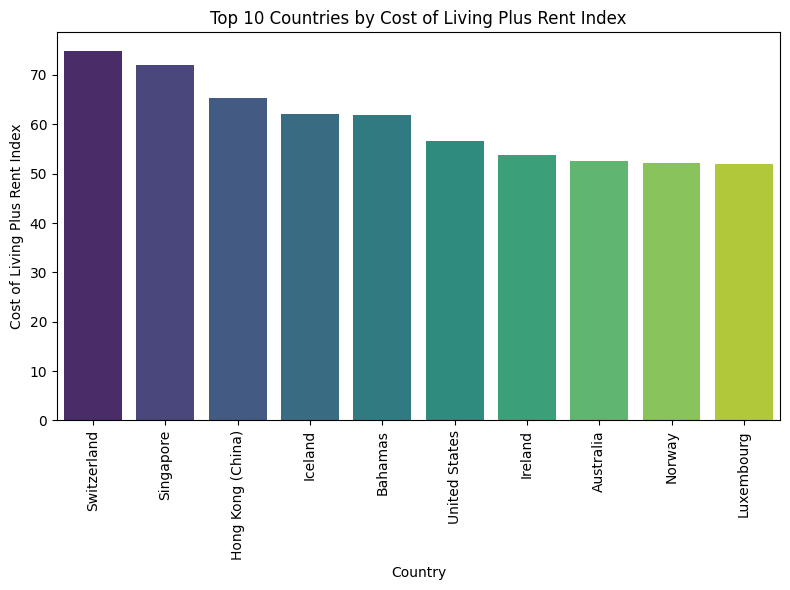

In [16]:
cols = ['Country', 'Cost of Living Plus Rent Index']
df_sorted = df.loc[:, cols].sort_values('Cost of Living Plus Rent Index', ascending = False).head(10)    #access Col Selection & Sorting in asc, only the top 10 rows with the highest values
fig, ax = plt.subplots(figsize=(8,6))                                                                    #creates a new figure and axes for the plot with specified dimensions.
sns.barplot(x='Country', y='Cost of Living Plus Rent Index', data=df_sorted, ax=ax, palette='viridis')   #bar plot and x, y data
ax.set_title('Top 10 Countries by Cost of Living Plus Rent Index')
ax.set_xlabel('Country')
ax.set_ylabel('Cost of Living Plus Rent Index')
ax.tick_params(axis='x', rotation=90)
plt.tight_layout()                                                                                       #adjusts the layout to ensure everything fits well within the figure.
plt.show()

C:\Users\jenaa\AppData\Local\Temp\ipykernel_12040\3198830371.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Cost of Living Index', data=df_sorted, ax=ax, palette='viridis')


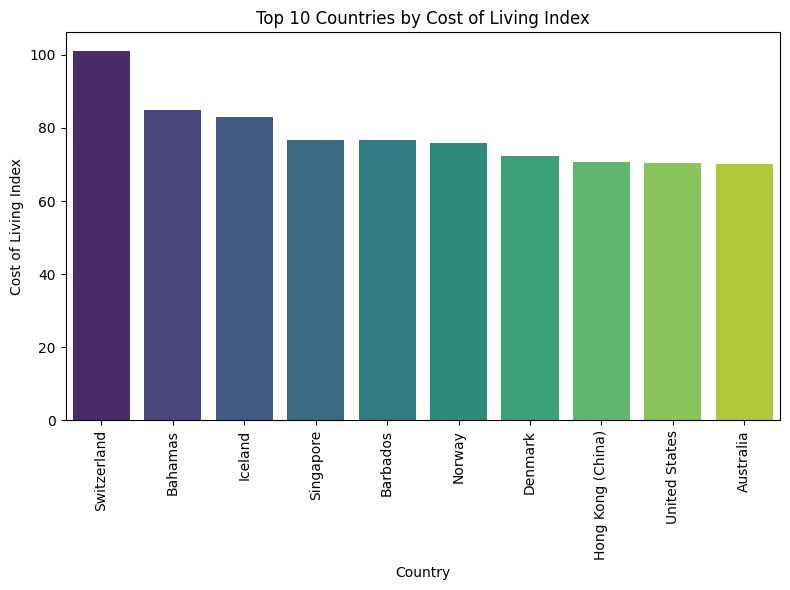

In [18]:
cols = ['Country', 'Cost of Living Index']
df_sorted = df.loc[:, cols].sort_values('Cost of Living Index', ascending = False).head(10)
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='Country', y='Cost of Living Index', data=df_sorted, ax=ax, palette='viridis')
ax.set_title('Top 10 Countries by Cost of Living Index')
ax.set_xlabel('Country')
ax.set_ylabel('Cost of Living Index')
ax.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

C:\Users\jenaa\AppData\Local\Temp\ipykernel_12040\781297065.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Groceries Index', data=df_sorted, ax=ax, palette='viridis')


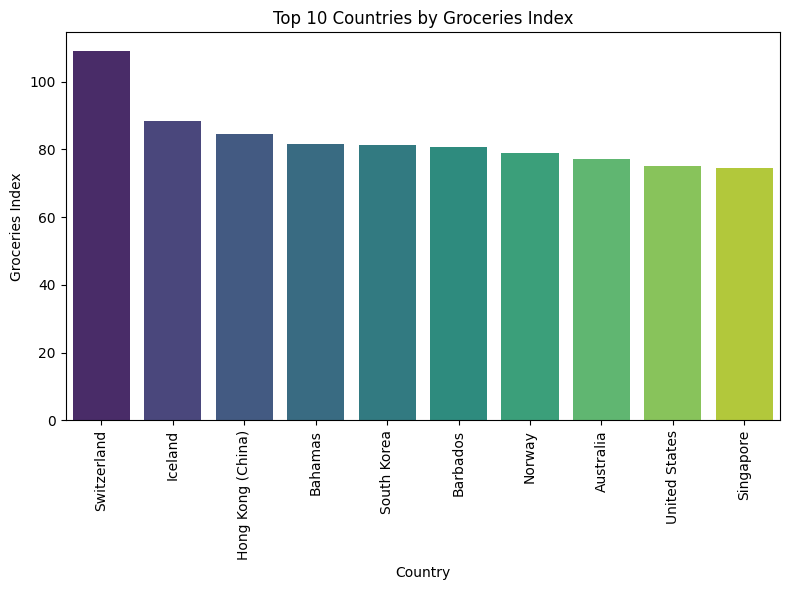

In [19]:
cols = ['Country', 'Groceries Index']
df_sorted = df.loc[:, cols].sort_values('Groceries Index', ascending = False).head(10)
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='Country', y='Groceries Index', data=df_sorted, ax=ax, palette='viridis')
ax.set_title('Top 10 Countries by Groceries Index')
ax.set_xlabel('Country')
ax.set_ylabel('Groceries Index')
ax.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

C:\Users\jenaa\AppData\Local\Temp\ipykernel_12040\481181039.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Restaurant Price Index', data=df_sorted, ax=ax, palette='rainbow')


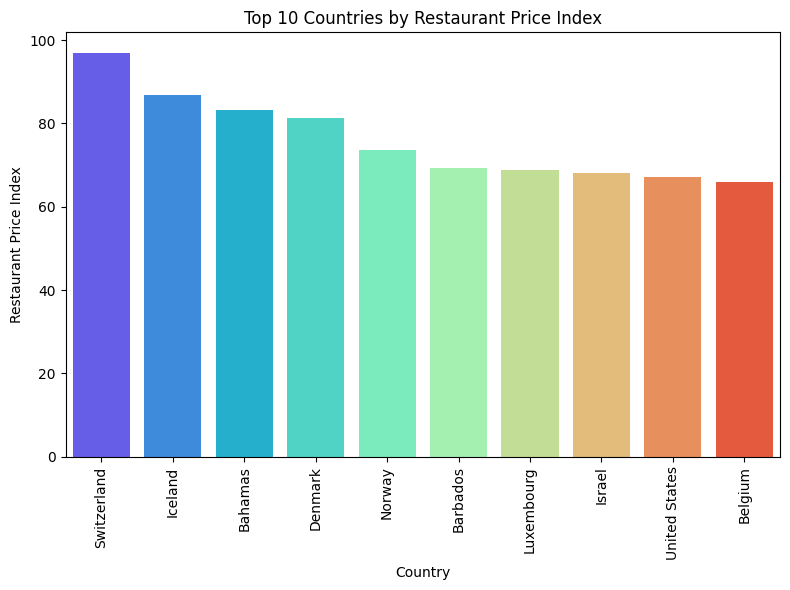

In [20]:
cols = ['Country', 'Restaurant Price Index']
df_sorted = df.loc[:, cols].sort_values('Restaurant Price Index', ascending = False).head(10)
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='Country', y='Restaurant Price Index', data=df_sorted, ax=ax, palette='rainbow')
ax.set_title('Top 10 Countries by Restaurant Price Index')
ax.set_xlabel('Country')
ax.set_ylabel('Restaurant Price Index')
ax.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

C:\Users\jenaa\AppData\Local\Temp\ipykernel_12040\1071545935.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Local Purchasing Power Index', data=df_sorted, ax=ax, palette='plasma')


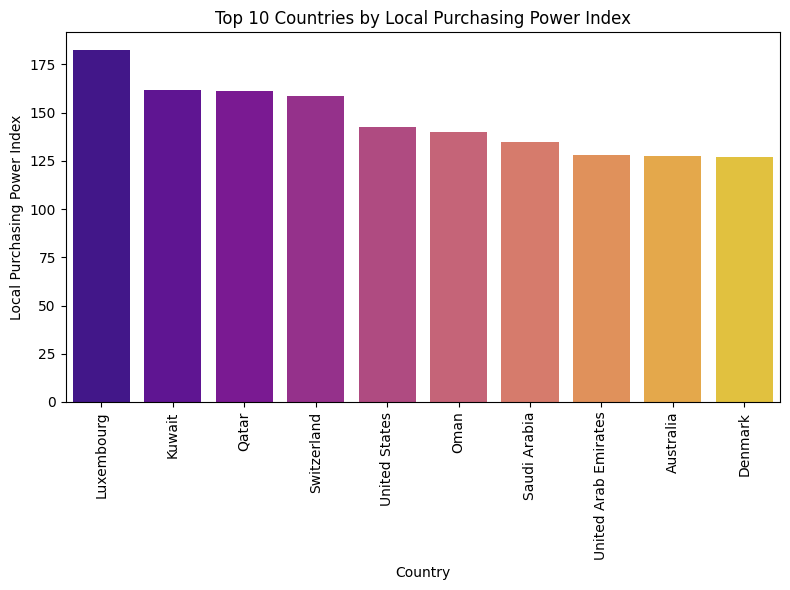

In [21]:
cols = ['Country', 'Local Purchasing Power Index']
df_sorted = df.loc[:, cols].sort_values('Local Purchasing Power Index', ascending = False).head(10)
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='Country', y='Local Purchasing Power Index', data=df_sorted, ax=ax, palette='plasma')
ax.set_title('Top 10 Countries by Local Purchasing Power Index')
ax.set_xlabel('Country')
ax.set_ylabel('Local Purchasing Power Index')
ax.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

In [22]:
df[df['Cost of Living Index'] >= 50] #Number of countries having cost of living index >= 50

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5
5,6,Norway,76.0,26.2,52.1,79.0,73.5,114.7
6,7,Denmark,72.3,26.4,50.2,64.8,81.3,127.2
7,8,Hong Kong (China),70.8,59.4,65.3,84.6,46.2,109.3
8,9,United States,70.4,41.7,56.6,75.0,67.2,142.3
9,10,Australia,70.2,33.4,52.5,77.3,62.5,127.4


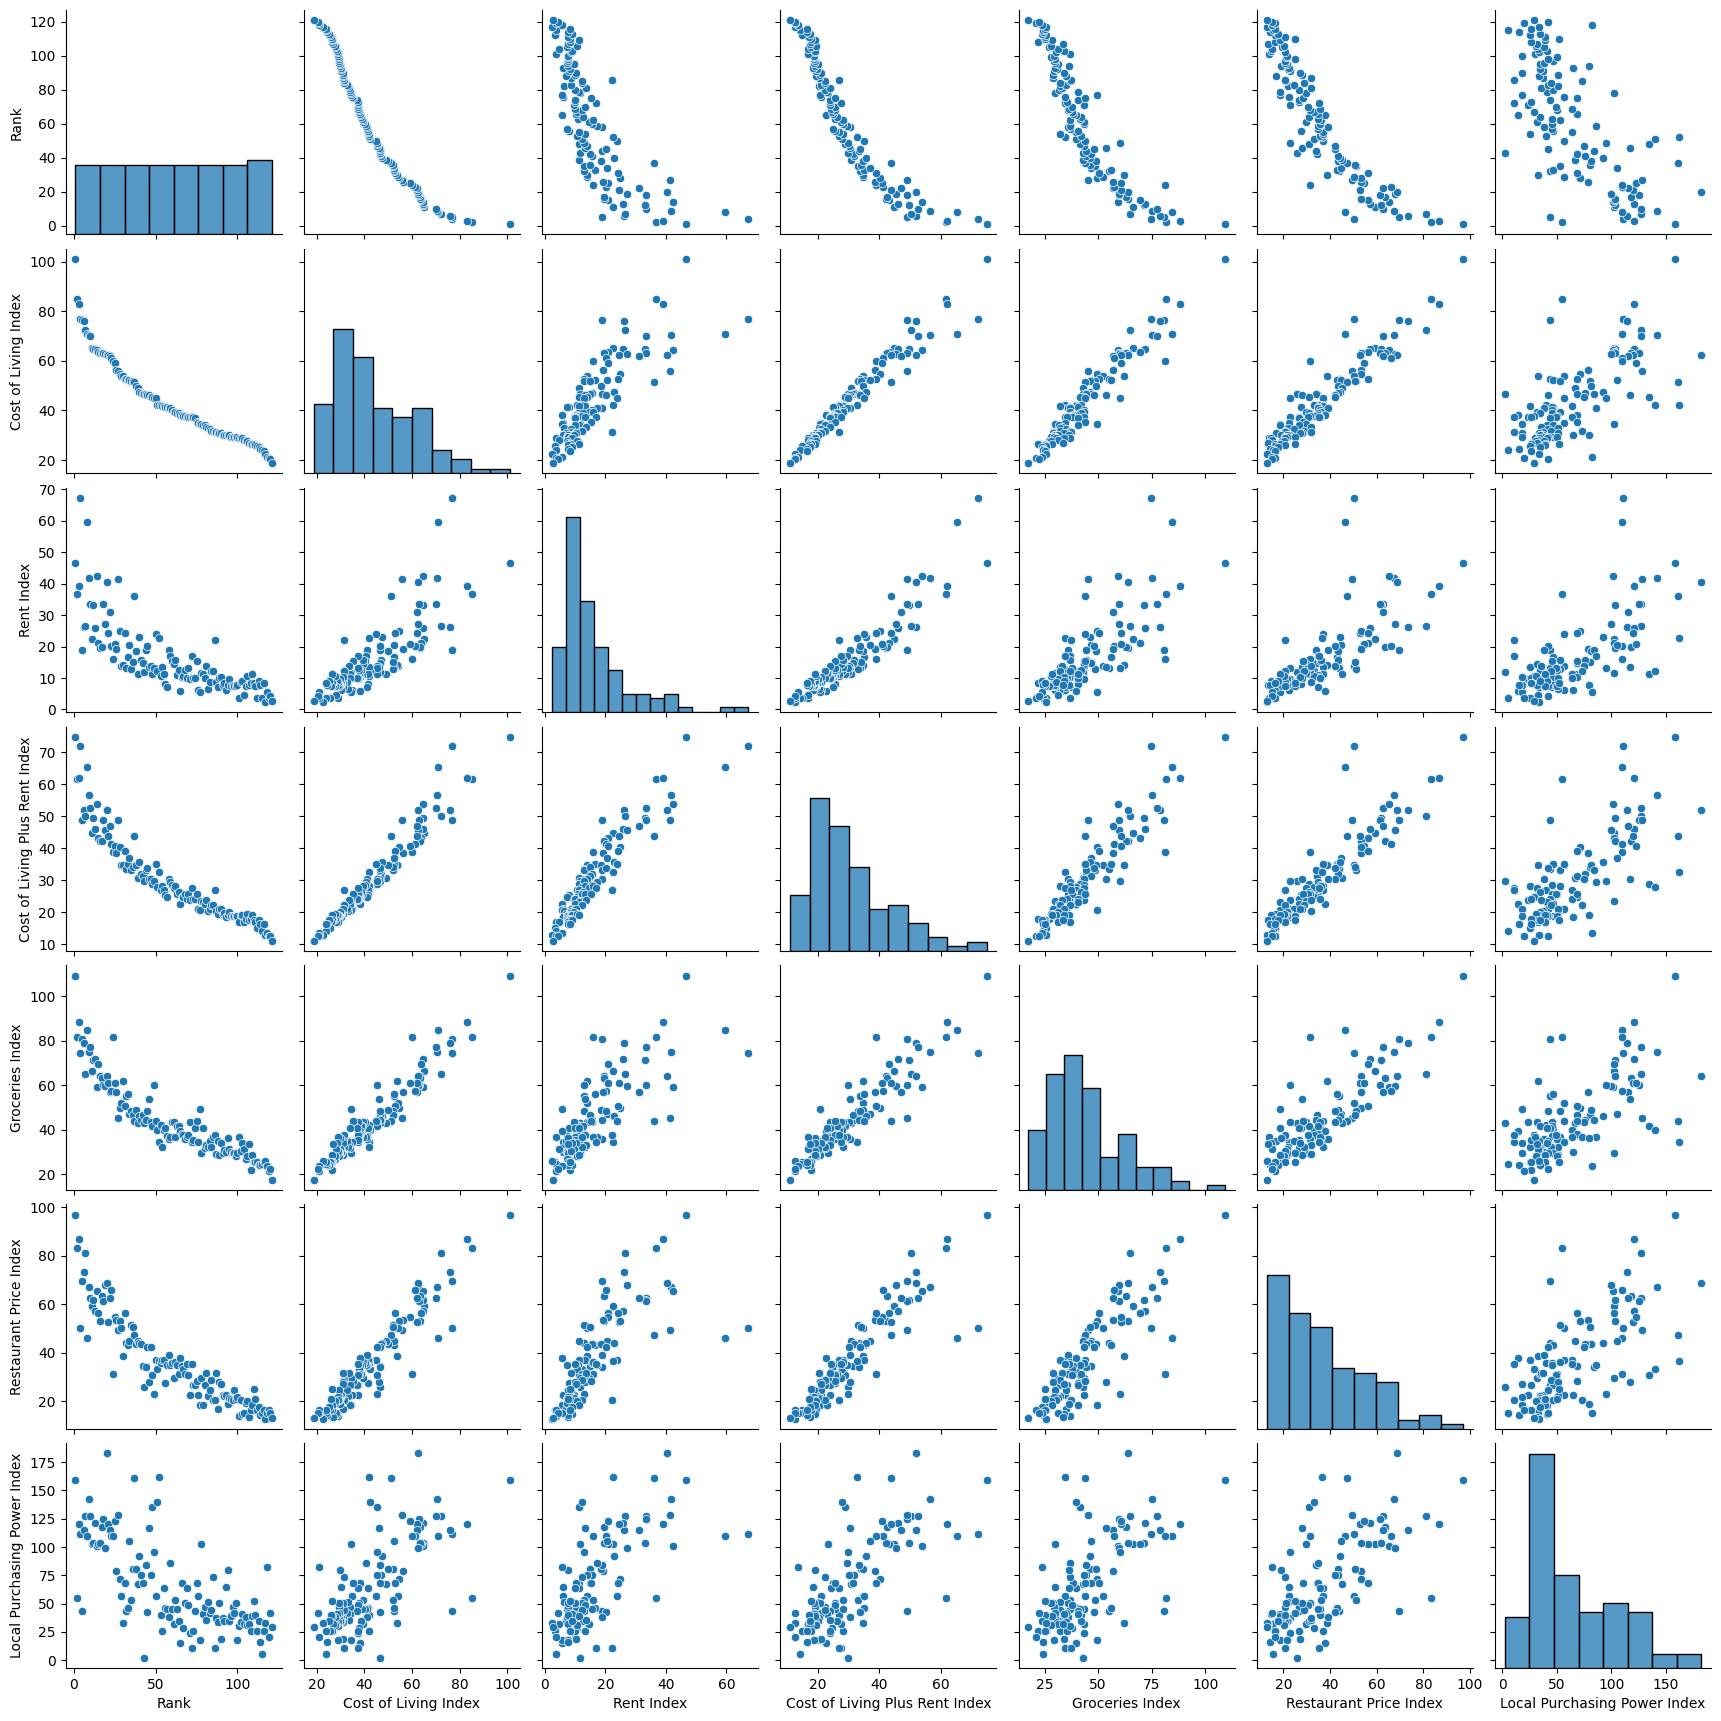

In [25]:
sns.pairplot(df)

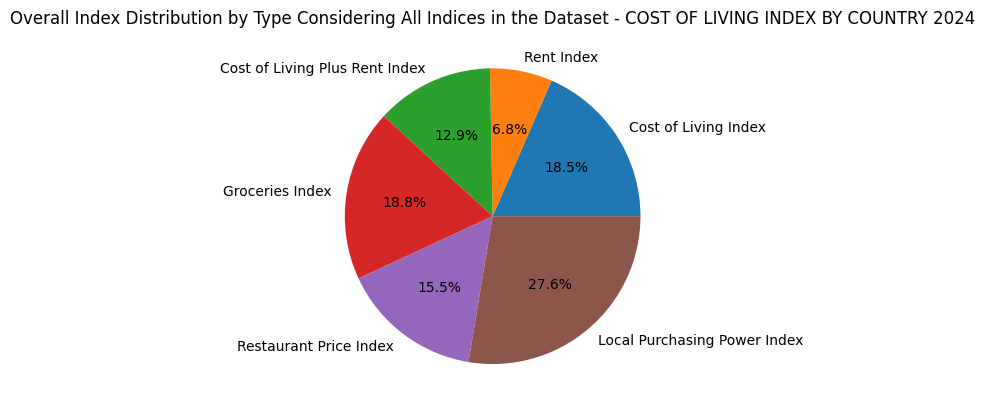

In [28]:
indices_columns = ['Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index', 'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index']   #list of the column names you want to sum
index_sums = df[indices_columns].sum()                           #Sums the values for each specified column across all rows
index_counts = index_sums.values                                 #Extracts the summed values for use in the pie chart
index_labels = index_sums.index                                  #xtracts the column names (labels) for use in the pie chart
plt.pie(index_counts, labels=index_labels, autopct='%1.1f%%')    
plt.title('Overall Index Distribution by Type Considering All Indices in the Dataset - COST OF LIVING INDEX BY COUNTRY 2024')
plt.show()